## Reading and Understanding the Data

In [240]:
#Importing required packages

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
lead_df = pd.read_csv(r"C:\Users\RAJAT KUMAR\Desktop\DATA SCIENCE\Machine learning\Case study\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")

In [242]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [243]:
#checking total rows and cols in dataset
lead_df.shape

#9240 rows and 37 columns

(9240, 37)

In [134]:
lead_df.info()

#Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [244]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [245]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Data Cleaning and Preparation

In [246]:
#Checking number of null values in each columns

lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [247]:
#checking for percentage of null values in each column

missing_percent = round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

In [248]:
missing_percent

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [249]:
#checking for duplicate values

lead_df[lead_df.duplicated(keep=False)]

#there is no duplicate values in the data.

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [250]:
#Let us drop the columns that have more than 30% null values

lead_df = lead_df.drop(["Specialization", "How did you hear about X Education", "Tags", "Lead Quality",
                          "Lead Profile","City", "Asymmetrique Activity Index", "Asymmetrique Profile Index",
                          "Asymmetrique Activity Score", "Asymmetrique Profile Score"], axis=1)

In [251]:
missing_percent = round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

In [252]:
missing_percent

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

### Following columns have null values :

- Lead Source
- Total Visits
- Page Views Per Visit
- Last Activity
- Country   
- What is your current occupation
- What matters most to you in choosing a course



In [253]:
#lets check for country
lead_df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [254]:
# From the above we can observe that Google appears twice with different cases.Hence we shall convert all rows with value google to Google
# Also since "Google" has the max value counts,so we can impute the null values with Google

lead_df["Lead Source"] = lead_df["Lead Source"].replace('google', 'Google')
lead_df["Lead Source"] = lead_df["Lead Source"].replace(np.nan, 'Google')

In [255]:
lead_df["Lead Source"].isnull().sum()

0

In [256]:
#lets check for total visits

lead_df["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [257]:
#As mode seems to be value of 0.0. Lets check median 

lead_df["TotalVisits"].median()

3.0

In [258]:
#lets replace the null value with median value

lead_df["TotalVisits"]=lead_df["TotalVisits"].replace(np.nan,lead_df["TotalVisits"].median())

In [259]:
lead_df["TotalVisits"].isnull().sum()

0

In [260]:
#lets check for Page Views Per Visit

lead_df["Page Views Per Visit"].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [261]:
#As mode seems to be value of 0.0. Lets check median 

lead_df["Page Views Per Visit"].median()

2.0

In [262]:
#lets replace the null value with median value

lead_df["Page Views Per Visit"]=lead_df["Page Views Per Visit"].replace(np.nan,lead_df["Page Views Per Visit"].median())

In [263]:
lead_df["Page Views Per Visit"].isnull().sum()

0

In [264]:
#lets check for Last Activity

lead_df["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [265]:
#Since we cannot say or assume what can be last activity for user so we can replace the null values with "unknown"

lead_df["Last Activity"]=lead_df["Last Activity"].replace(np.nan,"unknown")

In [266]:
lead_df["Last Activity"].isnull().sum()

0

In [267]:
#lets check for Country

lead_df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [268]:
#Since we can see India occurs most of the time for the Country columns and we have around 27% of the null values so we can drop it.

lead_df = lead_df.drop(["Country"], axis=1)

In [269]:
#Lets cehck for What is your current occupation

lead_df["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [270]:
#Since we can see Unemployed occurs most of the time and there is no info which can be replace so we can replace null values as "no info"

lead_df["What is your current occupation"] = lead_df["What is your current occupation"].replace(np.nan, "No Info")

In [271]:
lead_df["What is your current occupation"].isnull().sum()

0

In [272]:
#Lets check for What matters most to you in choosing a course

lead_df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [273]:
#Since better career prospects occurs most of the time and also columns has around 30% of missing data so we can drop this column

lead_df = lead_df.drop(["What matters most to you in choosing a course"], axis=1)

In [274]:
#let's check the null values now

lead_df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content         

In [275]:
lead_df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,No,No,No,No,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,No,No,No,No,No,No,No,SMS Sent


In [276]:
#As checked the following columns have only one value "No" in all the rows, we can drop these columns:
# Magazine
# Receive More Updates About Our Courses
# Update me on Supply Chain Content
# Get updates on DM Content
# I agree to pay the amount through cheque

lead_df = lead_df.drop(["Magazine", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", 
                          "Get updates on DM Content", "I agree to pay the amount through cheque"], axis=1)

In [277]:
lead_df.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [278]:
lead_df.shape

(9240, 20)

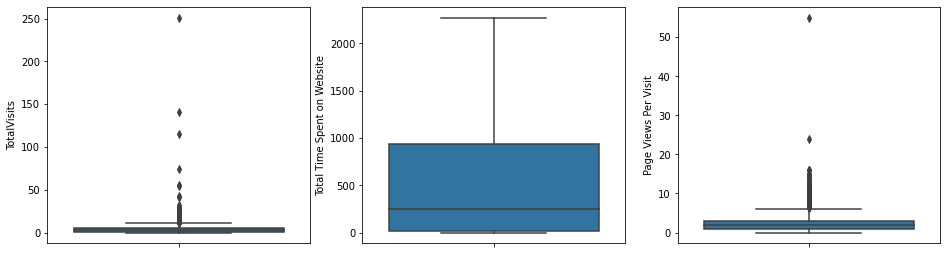

In [279]:
#Let's check outlier for all the numeric columns

plt.figure(figsize=(16, 20))
plt.subplot(4,3,1)
sns.boxplot(y = "TotalVisits", data = lead_df)
plt.subplot(4,3,2)
sns.boxplot(y = "Total Time Spent on Website", data = lead_df)
plt.subplot(4,3,3)
sns.boxplot(y = "Page Views Per Visit", data = lead_df)
plt.show()

In [280]:
#We can see there is outlier for columns "TotalVisits" and "Page Views Per Visit"

lead_df["TotalVisits"].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [281]:
lead_df["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [282]:
#lets remove value of more than 99% 

lead_df = lead_df[lead_df["TotalVisits"] < lead_df['TotalVisits'].quantile(0.99)]

In [283]:
lead_df["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [284]:
#Let's check for Page views per visit

lead_df["Page Views Per Visit"].describe()

count    9141.000000
mean        2.329506
std         2.046673
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [285]:
lead_df["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        2.329506
std         2.046673
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [286]:
#lets remove value of more than 99% 

lead_df = lead_df[lead_df["Page Views Per Visit"] < lead_df['Page Views Per Visit'].quantile(0.99)]

In [287]:
lead_df["Page Views Per Visit"].describe()

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [288]:
#Finally Now we have data prepared for analysis with no null values and outliers.

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9029 non-null   object 
 1   Lead Number                             9029 non-null   int64  
 2   Lead Origin                             9029 non-null   object 
 3   Lead Source                             9029 non-null   object 
 4   Do Not Email                            9029 non-null   object 
 5   Do Not Call                             9029 non-null   object 
 6   Converted                               9029 non-null   int64  
 7   TotalVisits                             9029 non-null   float64
 8   Total Time Spent on Website             9029 non-null   int64  
 9   Page Views Per Visit                    9029 non-null   float64
 10  Last Activity                           9029 non-null   obje

## Data Analyis

### Univariate Analysis for categorical variables

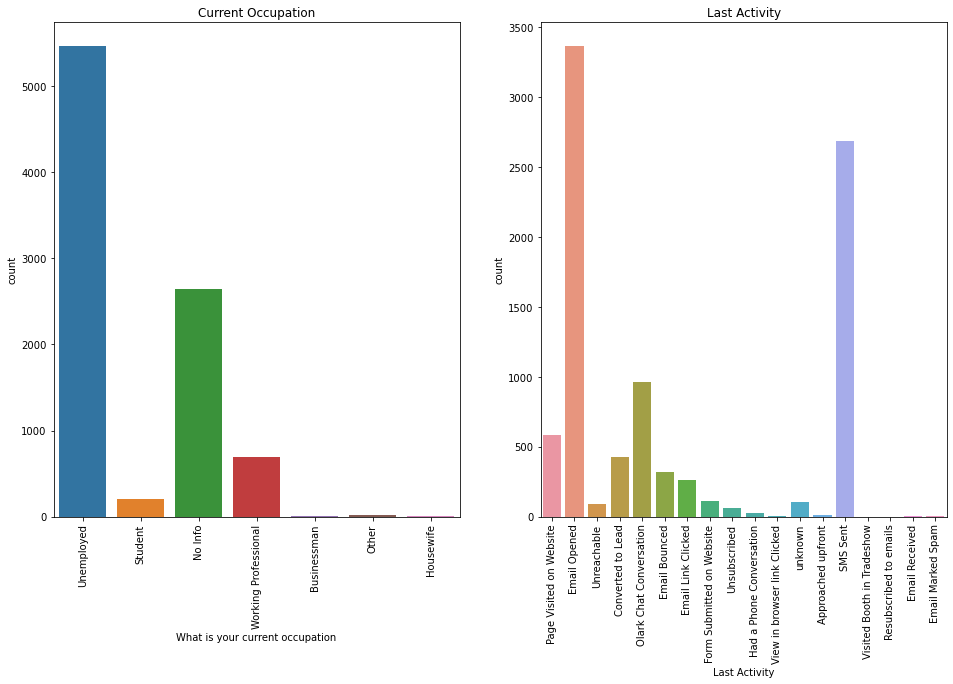

In [289]:
plt.figure(figsize = (16,20))

plt.subplot(2,2,1)
sns.countplot(lead_df["What is your current occupation"]).tick_params(axis='x', rotation = 90)
plt.title("Current Occupation")

plt.subplot(2,2,2)
sns.countplot(lead_df["Last Activity"]).tick_params(axis='x', rotation = 90)
plt.title("Last Activity")

plt.show()

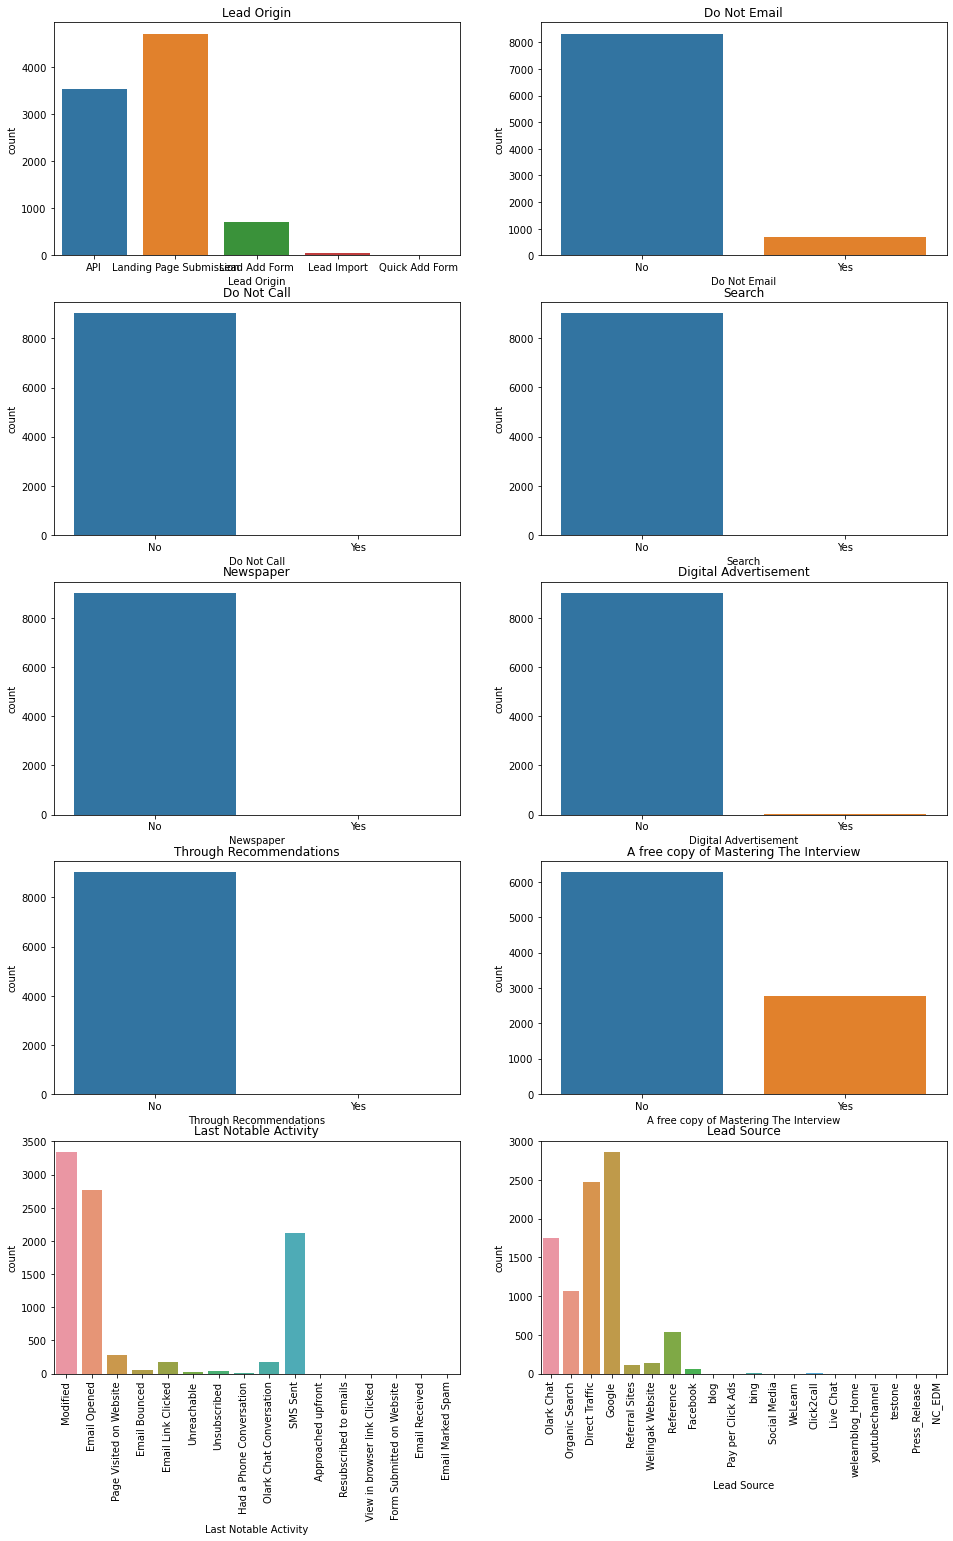

In [290]:
plt.figure(figsize = (16,30))

plt.subplot(6,2,1)
sns.countplot(lead_df["Lead Origin"])
plt.title("Lead Origin")

plt.subplot(6,2,2)
sns.countplot(lead_df["Do Not Email"])
plt.title("Do Not Email")

plt.subplot(6,2,3)
sns.countplot(lead_df["Do Not Call"])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(lead_df["Search"])
plt.title("Search")

plt.subplot(6,2,5)
sns.countplot(lead_df["Newspaper"])
plt.title("Newspaper")

plt.subplot(6,2,6)
sns.countplot(lead_df["Digital Advertisement"])
plt.title('Digital Advertisement')

plt.subplot(6,2,7)
sns.countplot(lead_df["Through Recommendations"])
plt.title("Through Recommendations")

plt.subplot(6,2,8)
sns.countplot(lead_df["A free copy of Mastering The Interview"])
plt.title("A free copy of Mastering The Interview")

plt.subplot(6,2,9)
sns.countplot(lead_df["Last Notable Activity"]).tick_params(axis='x', rotation = 90)
plt.title("Last Notable Activity")

plt.subplot(6,2,10)
sns.countplot(lead_df["Lead Source"]).tick_params(axis='x', rotation = 90)
plt.title("Lead Source")

plt.show()

### Univariate Analysis for numerical values

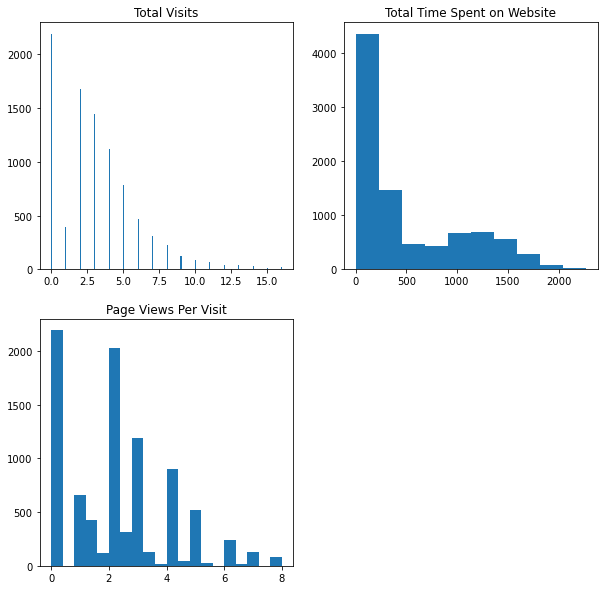

In [291]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(lead_df["TotalVisits"], bins = 200)
plt.title("Total Visits")

plt.subplot(2,2,2)
plt.hist(lead_df["Total Time Spent on Website"], bins = 10)
plt.title("Total Time Spent on Website")

plt.subplot(2,2,3)
plt.hist(lead_df["Page Views Per Visit"], bins = 20)
plt.title("Page Views Per Visit")

plt.show()

### Target Column comparison (Converted)

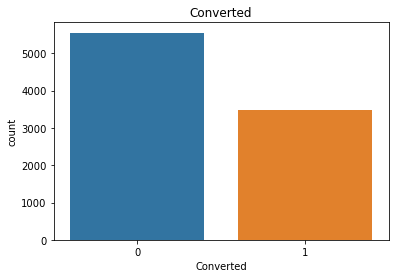

In [292]:
sns.countplot(lead_df["Converted"])
plt.title("Converted")
plt.show()

### Relating all the categorical variable with target variable(converted)

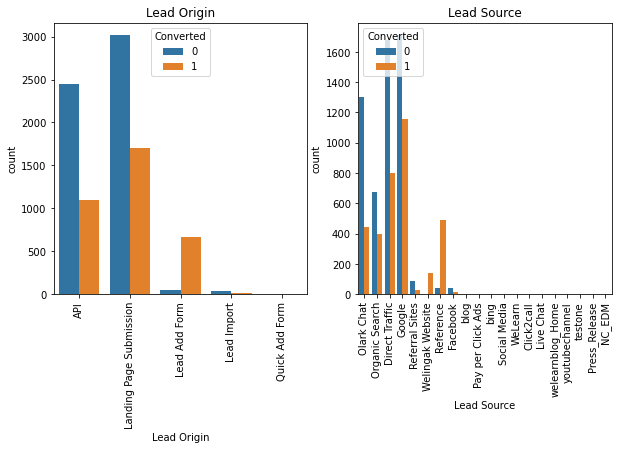

In [293]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x="Lead Origin", hue="Converted", data= lead_df).tick_params(axis='x', rotation = 90)
plt.title("Lead Origin")

plt.subplot(1,2,2)
sns.countplot(x="Lead Source", hue="Converted", data= lead_df).tick_params(axis='x', rotation = 90)
plt.title("Lead Source")

plt.show()

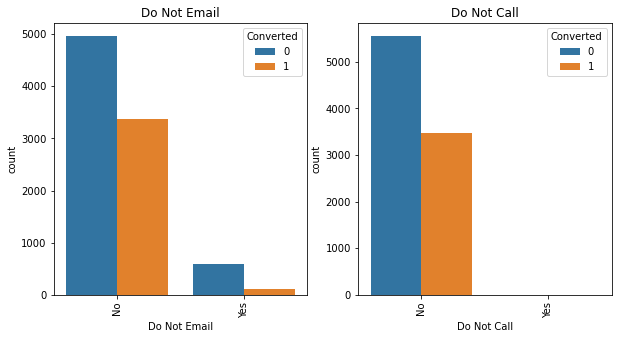

In [294]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x="Do Not Email", hue="Converted", data= lead_df).tick_params(axis='x', rotation = 90)
plt.title("Do Not Email")

plt.subplot(1,2,2)
sns.countplot(x="Do Not Call", hue="Converted", data= lead_df).tick_params(axis='x', rotation = 90)
plt.title("Do Not Call")

plt.show()

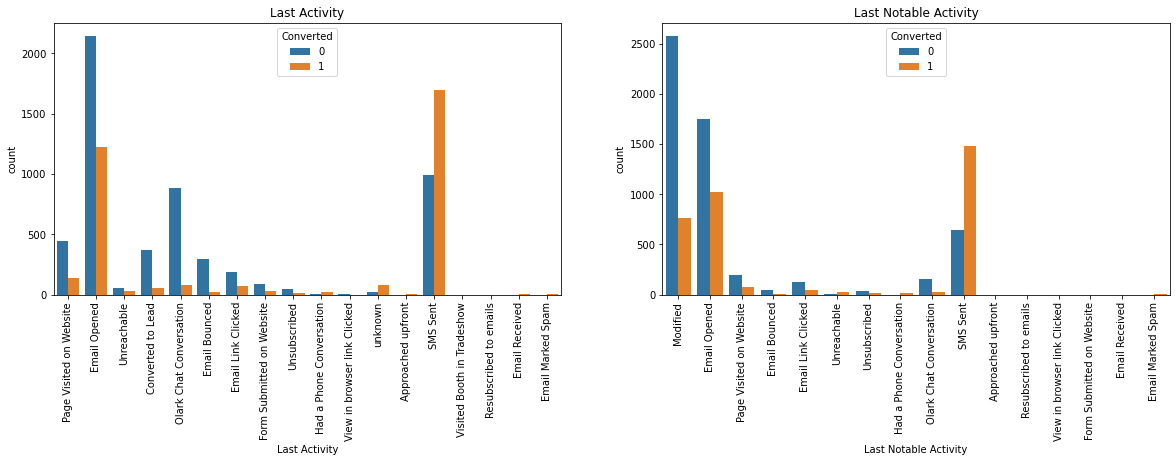

In [295]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x="Last Activity", hue="Converted", data= lead_df).tick_params(axis='x', rotation = 90)
plt.title("Last Activity")

plt.subplot(1,2,2)
sns.countplot(x="Last Notable Activity", hue="Converted", data= lead_df).tick_params(axis='x', rotation = 90)
plt.title("Last Notable Activity")

plt.show()

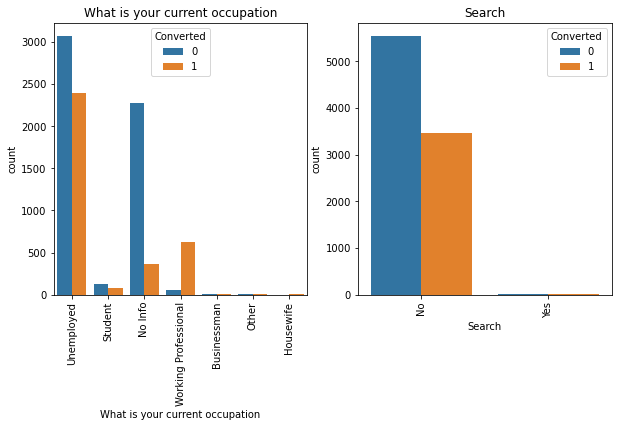

In [296]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x="What is your current occupation", hue="Converted", data= lead_df).tick_params(axis='x', rotation = 90)
plt.title("What is your current occupation")

plt.subplot(1,2,2)
sns.countplot(x="Search", hue="Converted", data= lead_df).tick_params(axis='x', rotation = 90)
plt.title("Search")

plt.show()

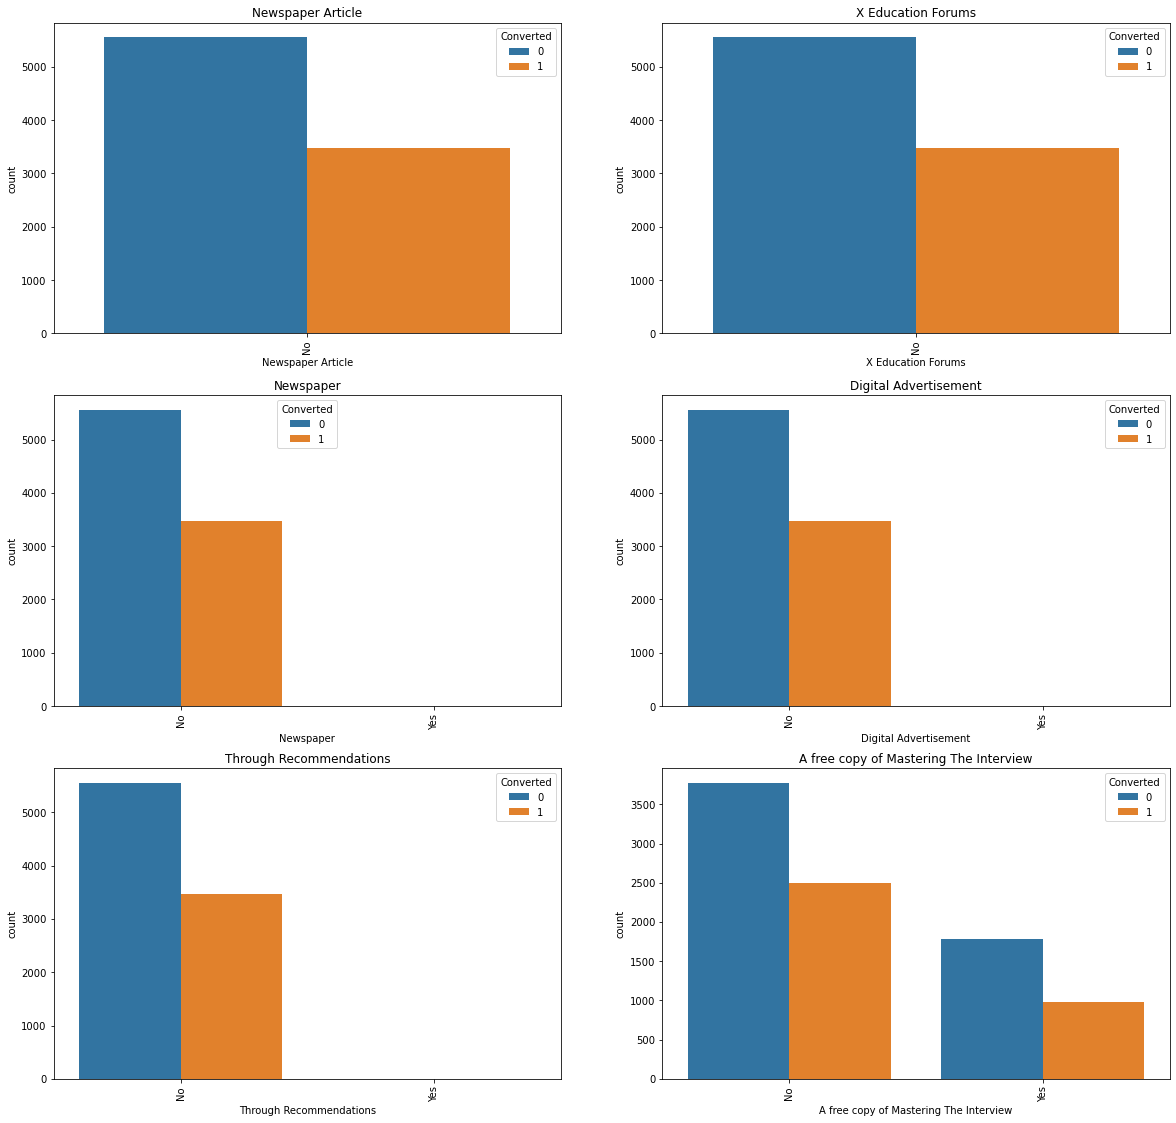

In [297]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(x="Newspaper Article", hue="Converted", data= lead_df).tick_params(axis='x', rotation = 90)
plt.title("Newspaper Article")

plt.subplot(6,2,2)
sns.countplot(x="X Education Forums", hue="Converted", data= lead_df).tick_params(axis='x', rotation = 90)
plt.title("X Education Forums")

plt.subplot(6,2,3)
sns.countplot(x="Newspaper", hue="Converted", data= lead_df).tick_params(axis='x', rotation = 90)
plt.title("Newspaper")

plt.subplot(6,2,4)
sns.countplot(x="Digital Advertisement", hue="Converted", data= lead_df).tick_params(axis='x', rotation = 90)
plt.title("Digital Advertisement")

plt.subplot(6,2,5)
sns.countplot(x="Through Recommendations", hue="Converted", data= lead_df).tick_params(axis='x', rotation = 90)
plt.title("Through Recommendations")

plt.subplot(6,2,6)
sns.countplot(x="A free copy of Mastering The Interview", hue="Converted", data= lead_df).tick_params(axis='x', rotation = 90)
plt.title("A free copy of Mastering The Interview")

plt.show()

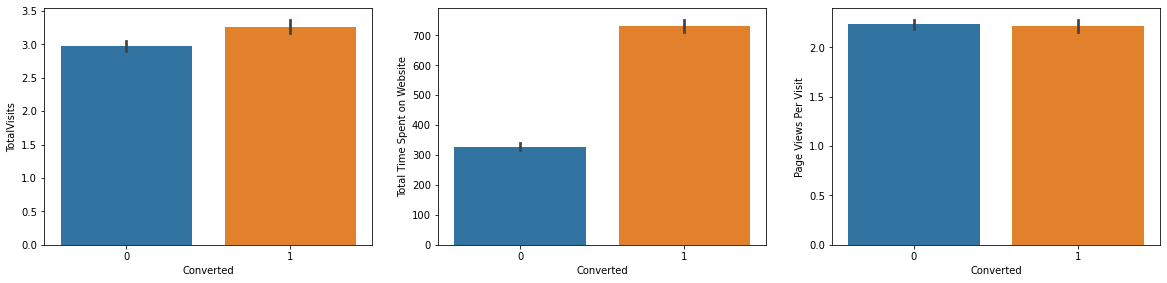

In [298]:
#Let's check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = "TotalVisits", x="Converted", data = lead_df)
plt.subplot(4,3,2)
sns.barplot(y = "Total Time Spent on Website", x="Converted", data = lead_df)
plt.subplot(4,3,3)
sns.barplot(y = "Page Views Per Visit", x="Converted", data = lead_df)

plt.show()


### We can have below conclusion from above analysis :-
#### >>We can conclude that the maximum conversion happened from Landing Page Submission.
#### >>Also it can be that major conversion in the lead source is from google.
#### >>Major conversion has happend from the emails that have been sent.
#### >>We can see that major conversions happened when calls were made.
#### >>last activity value of 'SMS Sent' had more conversion.
#### >>More conversion happend with people who are unemployed.
#### >>Conversion rate is high on leads who are not through search.
#### >>Since "Newspaper Article" and "X Education Forums"column now has only one value for all rows - "No" , it is safe to drop this columns and 
#### >>Conversion rate is high on leads who do not want a free copy of Mastering Interviews
#### >>The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit.

## Creating Dummy Variables

In [299]:
#Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(lead_df[["Lead Origin","Lead Source","Last Activity","What is your current occupation","Last Notable Activity"]], drop_first=True)
# Add the results to the master dataframe
lead_df_dum = pd.concat([lead_df, dummy], axis=1)

In [300]:
variablelist =  variablelist =  ["Do Not Email", "Do Not Call", "Search", "Digital Advertisement", "Through Recommendations", "A free copy of Mastering The Interview"]

#Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

#Applying the function to the columns
lead_df_dum[variablelist] = lead_df_dum[variablelist].apply(binary_map)

In [301]:
lead_df_dum.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,1,0,0,0,0,0,0,0


In [302]:
#Removing following columns from the lead_df_dum

lead_df_dum = lead_df_dum.drop(["Prospect ID", "Lead Number", "Lead Origin", "Lead Source", "Last Activity","What is your current occupation", "Last Notable Activity"], axis=1)

In [303]:
lead_df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 74 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9029 non-null   int64  
 1   Do Not Call                                           9029 non-null   int64  
 2   Converted                                             9029 non-null   int64  
 3   TotalVisits                                           9029 non-null   float64
 4   Total Time Spent on Website                           9029 non-null   int64  
 5   Page Views Per Visit                                  9029 non-null   float64
 6   Search                                                9029 non-null   int64  
 7   Newspaper Article                                     9029 non-null   object 
 8   X Education Forums                                    9029

In [304]:
lead_df_dum.shape

(9029, 74)

In [305]:
lead_df_dum = lead_df_dum.drop(["Newspaper Article", "X Education Forums", "Newspaper"], axis=1)

In [306]:
lead_df_dum.shape

#As there are 71 columns we cannont infer anything with the help of co-relation matrix using heat map due to huge data.

(9029, 71)

## Test-Train Split

In [307]:
from sklearn.model_selection import train_test_split

In [308]:
#Let's Put feature vairable to X

X = lead_df_dum.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [309]:
#Let's put response variable to y

y = lead_df_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [310]:
#Let's split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

## Rescaling the features with MinMax Scaling

In [311]:
from sklearn.preprocessing import MinMaxScaler

In [312]:
scaler = MinMaxScaler()
X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2240,0,0,0.1875,0.898963,0.375,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0.3125,0.706360,0.625,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4132,0,0,0.3750,0.768155,0.750,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
5573,0,0,0.1250,0.028868,0.250,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0.0625,0.009021,0.125,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [313]:
#Let's check the Conversion Rate percentage

converted = (sum(lead_df_dum["Converted"])/len(lead_df_dum["Converted"].index))*100
converted

#We can se that we have conversion rate around 39%

38.50924797873519

## Building Models

In [314]:
import statsmodels.api as sm

### Model 1
### Feature slection using RFE

In [315]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [316]:
logmodel_1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logmodel_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6259
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 03 May 2022   Deviance:                   1.5740e+05
Time:                        13:32:20   Pearson chi2:                 7.70e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 3.851e+15   6.14e+07   6.27e+07      0.000    3.85e+15    3.85e+15
Do Not Email                                         -1.522e+14   4.48e+06   -3.4e+07      0.000   -1.52e+14   -1.52e+14
Do Not Call                                           2.887e+15   4.76e+07   6.07e+07      0.000    2.89e+15    2.89e+15
TotalVisits                                           1.321e+15   7.66e+06   1.73e+08      0.000    1.32e+15    1.32e+15
Total Time Spent on Website                           3.629e+15   4.01e+06   9.05e+08      0.000    3.63e+15    3.63e+15
Page Views Per Visit                                 -5.689e+14   6.53e+06  -8.71e+07      0.000   -5.69e+14   -5.69e+14
Search                                                -1.34e+15   2.44e+07  -5.49e+07      0.000   -1.34e+15   -1.34e+15
Digital Advertisement                                 3.113e+13   4.76e+07   6.55e+05      0.000    3.11e+13    3.11e+13
Through Recommendations                              -5.702e+14    4.2e+07  -1.36e+07      0.000    -5.7e+14    -5.7e+14
A free copy of Mastering The Interview               -7.667e+13   2.69e+06  -2.85e+07      0.000   -7.67e+13   -7.67e+13
Lead Origin_Landing Page Submission                  -3.058e+13   2.74e+06  -1.12e+07      0.000   -3.06e+13   -3.06e+13
Lead Origin_Lead Add Form                             1.142e+15   1.33e+07   8.62e+07      0.000    1.14e+15    1.14e+15
Lead Origin_Lead Import                               2.441e+13    4.8e+07   5.09e+05      0.000    2.44e+13    2.44e+13
Lead Origin_Quick Add Form                            2.946e+15   6.74e+07   4.37e+07      0.000    2.95e+15    2.95e+15
Lead Source_Direct Traffic                           -2.567e+15   4.94e+07   -5.2e+07      0.000   -2.57e+15   -2.57e+15
Lead Source_Facebook                                 -1.629e+15   6.87e+07  -2.37e+07      0.000   -1.63e+15   -1.63e+15
Lead Source_Google                                   -2.233e+15   4.93e+07  -4.53e+07      0.000   -2.23e+15   -2.23e+15
Lead Source_Live Chat                                 2.518e+15   6.72e+07   3.75e+07      0.000    2.52e+15    2.52e+15
Lead Source_NC_EDM                                       0.6623   1.96e-07   3.38e+06      0.000       0.662       0.662
Lead Source_Olark Chat                                -1.34e+15   4.95e+07  -2.71e+07      0.000   -1.34e+15   -1.34e+15
Lead Source_Organic Search                           -2.442e+15   4.94e+07  -4.94e+07      0.000   -2.44e+15   -2.44e+15
Lead Source_Pay per Click Ads                          -37.2977   3.72e-07     -1e+08      0.000     -37.298     -37.298
Lead Source_Press_Release                               -5

In [317]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output

rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [318]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Digital Advertisement', False, 43),
 ('Through Recommendations', False, 28),
 ('A free copy of Mastering The Interview', False, 30),
 ('Lead Origin_Landing Page Submission', False, 38),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Origin_Quick Add Form', False, 14),
 ('Lead Source_Direct Traffic', False, 11),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Live Chat', False, 32),
 ('Lead Source_NC_EDM', False, 47),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Pay per Click Ads', False, 48),
 ('Lead Source_Press_Release', False, 49),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Social Media', False, 37),
 ('Lead Sour

In [320]:
#variables shortlisted by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Unreachable',
       'Last Activity_unknown', 'What is your current occupation_Housewife',
       'What is your current occupation_No Info',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

### Model 2

In [321]:
X_train_sm = sm.add_constant(X_train[col])
logmodel_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.8
Date:                Tue, 03 May 2022   Deviance:                       5021.5
Time:                        13:33:08   Pearson chi2:                 6.58e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1664      0.117    -18.487      0.000      -2.396      -1.937
Do Not Email                                            -1.1102      0.194     -5.720      0.000      -1.491      -0.730
TotalVisits                                              1.6158      0.286      5.654      0.000       1.056       2.176
Total Time Spent on Website                              4.5143      0.168     26.817      0.000       4.184       4.844
Page Views Per Visit                                    -0.7964      0.250     -3.188      0.001      -1.286      -0.307
Search                                                  -1.4589      0.997     -1.463      0.143      -3.414       0.496
Lead Origin_Lead Add Form                                3.7370      0.221     16.899      0.000       3.304       4.170
Lead Source_Olark Chat                                   1.4476      0.136     10.678      0.000       1.182       1.713
Lead Source_Welingak Website                             2.1220      0.742      2.858      0.004       0.667       3.577
Last Activity_Converted to Lead                         -1.0564      0.217     -4.859      0.000      -1.483      -0.630
Last Activity_Email Bounced                             -1.7352      0.493     -3.520      0.000      -2.701      -0.769
Last Activity_Olark Chat Conversation                   -1.3959      0.168     -8.304      0.000      -1.725      -1.066
Last Activity_Unreachable                               -1.2832      0.574     -2.236      0.025      -2.408      -0.158
Last Activity_unknown                                   -1.6002      0.468     -3.416      0.001      -2.518      -0.682
What is your current occupation_Housewife               22.8237   1.49e+04      0.002      0.999   -2.92e+04    2.93e+04
What is your current occupation_No Info                 -1.1803      0.090    -13.118      0.000      -1.357      -1.004
What is your current occupation_Working Professional     2.6293      0.202     13.001      0.000       2.233       3.026
Last Notable Activity_Email Bounced                      1.5310      0.673      2.274      0.023       0.211       2.851
Last Notable Activity_Had a Phone Conversation           3.1723      1.165      2.722      0.006       0.888       5.456
Last Notable Activity_SMS Sent                           1.4443      0.083     17.483      0.000       1.282       1.606
Last Notable Activity_Unreachable                        2.9245      0.790      3.703      0.000       1.377       4.472
========================================================================================================================
"""

In [322]:
#Removing column What is your current occupation_Housewife as it has a high pvalue and hence is insignificant

col = col.drop('What is your current occupation_Housewife',1)

### Model 3

In [323]:
X_train_sm = sm.add_constant(X_train[col])
logmodel_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2516.8
Date:                Tue, 03 May 2022   Deviance:                       5033.5
Time:                        13:33:16   Pearson chi2:                 6.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1500      0.117    -18.397      0.000      -2.379      -1.921
Do Not Email                                            -1.1139      0.194     -5.740      0.000      -1.494      -0.734
TotalVisits                                              1.6043      0.286      5.619      0.000       1.045       2.164
Total Time Spent on Website                              4.5101      0.168     26.818      0.000       4.181       4.840
Page Views Per Visit                                    -0.8046      0.250     -3.223      0.001      -1.294      -0.315
Search                                                  -1.4580      0.996     -1.464      0.143      -3.410       0.494
Lead Origin_Lead Add Form                                3.7377      0.221     16.925      0.000       3.305       4.171
Lead Source_Olark Chat                                   1.4358      0.135     10.608      0.000       1.171       1.701
Lead Source_Welingak Website                             2.1042      0.742      2.835      0.005       0.649       3.559
Last Activity_Converted to Lead                         -1.0665      0.217     -4.908      0.000      -1.492      -0.641
Last Activity_Email Bounced                             -1.7418      0.493     -3.533      0.000      -2.708      -0.775
Last Activity_Olark Chat Conversation                   -1.3998      0.168     -8.329      0.000      -1.729      -1.070
Last Activity_Unreachable                               -1.2911      0.574     -2.249      0.024      -2.416      -0.166
Last Activity_unknown                                   -1.5724      0.465     -3.383      0.001      -2.483      -0.662
What is your current occupation_No Info                 -1.1852      0.090    -13.180      0.000      -1.361      -1.009
What is your current occupation_Working Professional     2.6226      0.202     12.970      0.000       2.226       3.019
Last Notable Activity_Email Bounced                      1.5347      0.673      2.279      0.023       0.215       2.855
Last Notable Activity_Had a Phone Conversation           3.1658      1.165      2.717      0.007       0.882       5.450
Last Notable Activity_SMS Sent                           1.4369      0.083     17.410      0.000       1.275       1.599
Last Notable Activity_Unreachable                        2.9273      0.790      3.706      0.000       1.379       4.475
========================================================================================================================
"""

In [324]:
#Removing column search as it has a high pvalue and hence is insignificant

col = col.drop('Search',1)

### Model 4

In [325]:
X_train_sm = sm.add_constant(X_train[col])
logmodel_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel_4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2517.9
Date:                Tue, 03 May 2022   Deviance:                       5035.9
Time:                        13:33:26   Pearson chi2:                 6.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1420      0.117    -18.352      0.000      -2.371      -1.913
Do Not Email                                            -1.1115      0.194     -5.728      0.000      -1.492      -0.731
TotalVisits                                              1.5785      0.285      5.537      0.000       1.020       2.137
Total Time Spent on Website                              4.5073      0.168     26.809      0.000       4.178       4.837
Page Views Per Visit                                    -0.8136      0.249     -3.261      0.001      -1.302      -0.325
Lead Origin_Lead Add Form                                3.7302      0.221     16.897      0.000       3.297       4.163
Lead Source_Olark Chat                                   1.4264      0.135     10.545      0.000       1.161       1.691
Lead Source_Welingak Website                             2.1035      0.742      2.834      0.005       0.649       3.558
Last Activity_Converted to Lead                         -1.0681      0.217     -4.917      0.000      -1.494      -0.642
Last Activity_Email Bounced                             -1.7421      0.493     -3.537      0.000      -2.708      -0.777
Last Activity_Olark Chat Conversation                   -1.3979      0.168     -8.321      0.000      -1.727      -1.069
Last Activity_Unreachable                               -1.2879      0.574     -2.244      0.025      -2.413      -0.163
Last Activity_unknown                                   -1.5662      0.464     -3.372      0.001      -2.476      -0.656
What is your current occupation_No Info                 -1.1827      0.090    -13.158      0.000      -1.359      -1.006
What is your current occupation_Working Professional     2.6206      0.202     12.958      0.000       2.224       3.017
Last Notable Activity_Email Bounced                      1.5351      0.673      2.281      0.023       0.216       2.854
Last Notable Activity_Had a Phone Conversation           3.1705      1.165      2.722      0.006       0.888       5.453
Last Notable Activity_SMS Sent                           1.4376      0.082     17.426      0.000       1.276       1.599
Last Notable Activity_Unreachable                        2.9269      0.790      3.706      0.000       1.379       4.475
========================================================================================================================
"""

In [326]:
#Removing column Last Activity_Unreachable as it has a high pvalue and hence is insignificant

col = col.drop('Last Activity_Unreachable',1)

### Model 5

In [327]:
X_train_sm = sm.add_constant(X_train[col])
logmodel_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel_5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2521.2
Date:                Tue, 03 May 2022   Deviance:                       5042.4
Time:                        13:33:36   Pearson chi2:                 6.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1539      0.117    -18.468      0.000      -2.382      -1.925
Do Not Email                                            -1.1214      0.194     -5.790      0.000      -1.501      -0.742
TotalVisits                                              1.5896      0.285      5.577      0.000       1.031       2.148
Total Time Spent on Website                              4.5114      0.168     26.849      0.000       4.182       4.841
Page Views Per Visit                                    -0.8283      0.249     -3.323      0.001      -1.317      -0.340
Lead Origin_Lead Add Form                                3.7295      0.221     16.910      0.000       3.297       4.162
Lead Source_Olark Chat                                   1.4291      0.135     10.568      0.000       1.164       1.694
Lead Source_Welingak Website                             2.1127      0.742      2.846      0.004       0.658       3.568
Last Activity_Converted to Lead                         -1.0574      0.217     -4.867      0.000      -1.483      -0.632
Last Activity_Email Bounced                             -1.7231      0.493     -3.497      0.000      -2.689      -0.757
Last Activity_Olark Chat Conversation                   -1.3895      0.168     -8.270      0.000      -1.719      -1.060
Last Activity_unknown                                   -1.5542      0.464     -3.347      0.001      -2.464      -0.644
What is your current occupation_No Info                 -1.1786      0.090    -13.116      0.000      -1.355      -1.002
What is your current occupation_Working Professional     2.6295      0.202     13.002      0.000       2.233       3.026
Last Notable Activity_Email Bounced                      1.5359      0.673      2.281      0.023       0.216       2.856
Last Notable Activity_Had a Phone Conversation           3.1836      1.164      2.734      0.006       0.901       5.466
Last Notable Activity_SMS Sent                           1.4504      0.082     17.604      0.000       1.289       1.612
Last Notable Activity_Unreachable                        1.6499      0.546      3.023      0.003       0.580       2.720
========================================================================================================================
"""

In [328]:
#Removing column Last Notable Activity_Email Bounced as it has a high pvalue and hence is insignificant

col = col.drop('Last Notable Activity_Email Bounced',1)

### Model 6

In [329]:
X_train_sm = sm.add_constant(X_train[col])
logmodel_6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel_6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2523.7
Date:                Tue, 03 May 2022   Deviance:                       5047.4
Time:                        13:33:46   Pearson chi2:                 6.56e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1534      0.117    -18.460      0.000      -2.382      -1.925
Do Not Email                                            -1.0991      0.192     -5.710      0.000      -1.476      -0.722
TotalVisits                                              1.5980      0.285      5.605      0.000       1.039       2.157
Total Time Spent on Website                              4.5046      0.168     26.830      0.000       4.176       4.834
Page Views Per Visit                                    -0.8315      0.249     -3.337      0.001      -1.320      -0.343
Lead Origin_Lead Add Form                                3.7024      0.219     16.884      0.000       3.273       4.132
Lead Source_Olark Chat                                   1.4313      0.135     10.584      0.000       1.166       1.696
Lead Source_Welingak Website                             2.1888      0.746      2.936      0.003       0.728       3.650
Last Activity_Converted to Lead                         -1.0580      0.217     -4.866      0.000      -1.484      -0.632
Last Activity_Email Bounced                             -1.1471      0.377     -3.042      0.002      -1.886      -0.408
Last Activity_Olark Chat Conversation                   -1.3914      0.168     -8.280      0.000      -1.721      -1.062
Last Activity_unknown                                   -1.5358      0.464     -3.313      0.001      -2.444      -0.627
What is your current occupation_No Info                 -1.1800      0.090    -13.142      0.000      -1.356      -1.004
What is your current occupation_Working Professional     2.6502      0.204     12.999      0.000       2.251       3.050
Last Notable Activity_Had a Phone Conversation           3.1829      1.165      2.733      0.006       0.900       5.466
Last Notable Activity_SMS Sent                           1.4492      0.082     17.598      0.000       1.288       1.611
Last Notable Activity_Unreachable                        1.6500      0.546      3.024      0.002       0.580       2.720
========================================================================================================================
"""

### the Model 6 seems to be stable with significant pvalues, we shall go ahead with this model for further analysis

In [330]:
#Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.669052
113     0.487565
4132    0.782879
5573    0.115941
1109    0.012682
2282    0.045910
2976    0.766014
8431    0.416192
2770    0.824779
5790    0.996489
dtype: float64

In [331]:
#Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.66905232, 0.48756524, 0.78287943, 0.11594095, 0.01268215,
       0.04590963, 0.76601376, 0.41619187, 0.82477879, 0.99648947])

In [332]:
#Creating a dataframe with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.669052,2240
1,0,0.487565,113
2,1,0.782879,4132
3,0,0.115941,5573
4,0,0.012682,1109


In [333]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.669052,2240,1
1,0,0.487565,113,0
2,1,0.782879,4132,1
3,0,0.115941,5573,0
4,0,0.012682,1109,0


#### Lets check the confusion metrics and accuracy

In [334]:
from sklearn import metrics

In [335]:
#Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3411  447]
 [ 705 1757]]


In [336]:
#Predicted     not_converted    converted
#Actual
#not_converted        3397      461
#converted            725       1737

In [337]:
#Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8177215189873418


### Accuracy rate is around 81% which is good. However we will also need to calculate the other metrics as we cannot depend only on the accuracy metrics

## Checking VIF's

In [338]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.12
1,TotalVisits,4.69
2,Total Time Spent on Website,2.10
0,Do Not Email,1.82
8,Last Activity_Email Bounced,1.76
5,Lead Source_Olark Chat,1.60
4,Lead Origin_Lead Add Form,1.56
11,What is your current occupation_No Info,1.52
14,Last Notable Activity_SMS Sent,1.45
9,Last Activity_Olark Chat Conversation,1.44


#### As we can see that all variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

## Plotting the ROC Curve

In [339]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [340]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

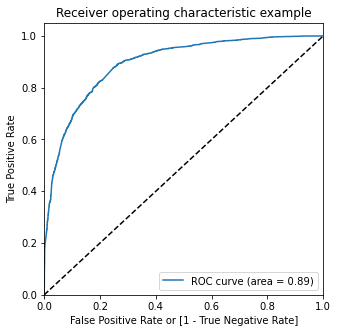

In [341]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Finding Optimal Cutoff Point

In [342]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.669052,2240,1,1,1,1,1,1,1,1,0,0,0
1,0,0.487565,113,0,1,1,1,1,1,0,0,0,0,0
2,1,0.782879,4132,1,1,1,1,1,1,1,1,1,0,0
3,0,0.115941,5573,0,1,1,0,0,0,0,0,0,0,0
4,0,0.012682,1109,0,1,0,0,0,0,0,0,0,0,0


In [343]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389557  1.000000  0.000000
0.1   0.1  0.610127  0.978067  0.375324
0.2   0.2  0.768354  0.916734  0.673665
0.3   0.3  0.797627  0.882616  0.743390
0.4   0.4  0.813608  0.781885  0.833852
0.5   0.5  0.817722  0.713647  0.884137
0.6   0.6  0.811076  0.644192  0.917574
0.7   0.7  0.788133  0.534931  0.949715
0.8   0.8  0.769146  0.454915  0.969673
0.9   0.9  0.715665  0.289602  0.987558


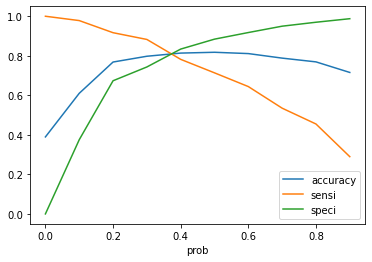

In [344]:
#Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [345]:
#Let us make the final prediction using 0.37 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.669052,2240,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.487565,113,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.782879,4132,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.115941,5573,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.012682,1109,0,1,0,0,0,0,0,0,0,0,0,0


In [346]:
#Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.669052,2240,1,1,1,1,1,1,1,1,0,0,0,1,67
1,0,0.487565,113,0,1,1,1,1,1,0,0,0,0,0,1,49
2,1,0.782879,4132,1,1,1,1,1,1,1,1,1,0,0,1,78
3,0,0.115941,5573,0,1,1,0,0,0,0,0,0,0,0,0,12
4,0,0.012682,1109,0,1,0,0,0,0,0,0,0,0,0,0,1
5,0,0.045910,2282,0,1,0,0,0,0,0,0,0,0,0,0,5
6,1,0.766014,2976,1,1,1,1,1,1,1,1,1,0,0,1,77
7,0,0.416192,8431,0,1,1,1,1,1,0,0,0,0,0,1,42
8,1,0.824779,2770,1,1,1,1,1,1,1,1,1,1,0,1,82
9,1,0.996489,5790,1,1,1,1,1,1,1,1,1,1,1,1,100


In [347]:
#checking if 80% cases are correctly predicted based on the converted column.
#get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1983
0     479
Name: final_predicted, dtype: int64

In [348]:
#check the precentage of final_predicted conversions

1965/float(1965+497)

0.7981316003249391

### We can conclude that the final prediction of conversions have a target of 80% (79.8%) conversion as per the X Educations CEO's requirement . Hence this is a good model.

In [349]:
#Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8123417721518987

### Metrics - Precision and Recall

In [350]:
#Looking at the confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3411,  447],
       [ 705, 1757]], dtype=int64)

In [351]:
from sklearn.metrics import precision_score, recall_score

In [352]:
#precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7971869328493648

In [353]:
#recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7136474411047928

### Precision and recall tradeoff

In [354]:
from sklearn.metrics import precision_recall_curve

In [355]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    0
 6318    0
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [356]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

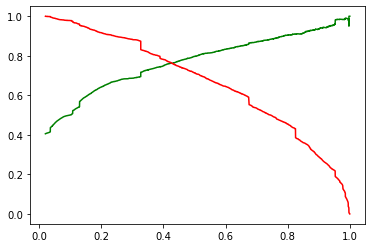

In [357]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [358]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [359]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_unknown,What is your current occupation_No Info,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
2296,0,0.1875,0.665313,0.37500,0,0,0,0,0,0,0,0,0,0,1,0
8697,0,0.4375,0.184032,0.21875,0,0,0,0,0,0,0,0,0,0,1,0
7378,0,0.1250,0.163284,0.25000,0,0,0,0,0,0,0,0,0,0,0,0
8631,0,0.3125,0.407307,0.62500,0,0,0,0,0,0,0,0,0,0,0,0
4799,0,0.5000,0.744700,1.00000,0,0,0,0,0,0,0,0,0,0,1,0


In [360]:
X_test_sm = sm.add_constant(X_test)

In [361]:
y_test_pred = res.predict(X_test_sm)

In [362]:
y_test_pred[:10]

2296    0.907259
8697    0.655218
7378    0.193730
8631    0.416077
4799    0.932007
4503    0.388654
7129    0.935266
1717    0.129865
8398    0.895557
5116    0.326928
dtype: float64

In [363]:
#Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [364]:
#Let's see the head

y_pred_1.head()

,0
2296,0.907259
8697,0.655218
7378,0.193730
8631,0.416077
4799,0.932007


In [365]:
#Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [366]:
#Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [367]:
#Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [368]:
#Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [369]:
y_pred_final.head()

,Converted,LeadId,0
0,1,2296,0.907259
1,0,8697,0.655218
2,0,7378,0.193730
3,0,8631,0.416077
4,1,4799,0.932007


In [370]:
#Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [372]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob
0,1,2296,0.907259
1,0,8697,0.655218
2,0,7378,0.193730
3,0,8631,0.416077
4,1,4799,0.932007


In [373]:
#Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [374]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob,final_predicted
0,1,2296,0.907259,1
1,0,8697,0.655218,1
2,0,7378,0.193730,0
3,0,8631,0.416077,1
4,1,4799,0.932007,1


In [375]:
#Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Converted,LeadId,Converted_Prob,final_predicted,lead_score
0,1,2296,0.907259,1,91
1,0,8697,0.655218,1,66
2,0,7378,0.193730,0,19
3,0,8631,0.416077,1,42
4,1,4799,0.932007,1,93
5,0,4503,0.388654,1,39
6,0,7129,0.935266,1,94
7,0,1717,0.129865,0,13
8,0,8398,0.895557,1,90
9,1,5116,0.326928,0,33


In [376]:
#checking if 80% cases are correctly predicted based on the converted column.
#get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    814
0    201
Name: final_predicted, dtype: int64

In [377]:
#check the precentage of final_predicted conversions on test data

797/float(797+218)

0.7852216748768472

#### Hence we can see that the final prediction of conversions have a target rate of 79% (78.5%) (Around 1 % short of the predictions made on training data set)

In [378]:
#Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8150609080841639

### Precision and Recall metrics for the test set

In [379]:
#precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

#recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7307001795332136
recall  0.8019704433497536


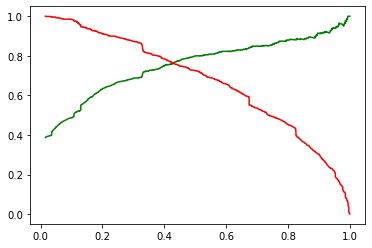

In [380]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Conclusion :

#### Accuracy, Sensitivity and Specificity values of test set are around 81%, 79% and 82% which are approximately closer to the respective values calculated using trained set.
#### Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
#### Hence overall this model seems to be good.   